No internal model

In [1]:
name='Experiment0'

In [2]:
#this allows relative imports in notebook
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from UCLSE.dyna_q.Experiment1a import Experiment
from UCLSE.dyna_q.dyna_q import TabularMemory
from UCLSE.dyna_q.benchmarking import BenchmarkAgent, SpoofAgent, DoNothing
import numpy as np
import pandas as pd
import os
import torch
import visdom
import matplotlib.pyplot as plt

In [4]:
vis=visdom.Visdom(port=8097)

In [5]:
def reward_oracle(observation,cutoff=50,ub=6,lb=-2,lamb=0.5):


    distance=observation.distance
    inventory=observation.inventory
    orders_out=observation.orders_out
    bid_change=observation.bid_change
    bid_ask_spread=observation.bid_ask_spread
    time_left=observation.time_left

    ans=lamb*bid_change

    if inventory==0:   #terminal            
            
            ans+=-(1-lamb)*distance
            ans-=lamb*bid_change

    elif inventory>1: #terminal
            
            ans+=-bid_ask_spread*(inventory-1)
            ans+=-(1-lamb)*distance
            ans+=-1 #penalty
           
    else:

            if orders_out>0: 
                ans+=1/250


            if time_left==1: #terminal takes account of exit spread
               
                ans+=-(1-lamb)*distance

            if -distance>=ub:
                
                ans+=-(1-lamb)*distance
              

            elif -distance<lb:
               
                ans+=-(1-lamb)*distance
               

    return ans 

def done_oracle(observation,cutoff=50,lb=-2,ub=6):

    distance=observation.distance
    inventory=observation.inventory
    orders_out=observation.orders_out
    time_left=observation.time_left

    if inventory==0:
        done=1
        why=f'inventory {inventory}=0'
    elif time_left>=1:
        done=1
        why=f'time up {time_left}'
    elif inventory>1:
        done=1
        why=f'inventory {inventory}>1'
    elif -distance>=ub:
        done=1
        why=f'-distance {distance} >ub {ub}'
    elif -distance<lb: 
        done=1
        why=f'-distance {distance}<lb {lb}'

    else:
        done=0 
        why=None
    return done,why

In [6]:
trader_pref_kwargs={'qty_min':-5,'qty_max':5,'sigma_pv':1}
timer_kwargs={'start':0,'end':6000,'step':1}
price_sequence_kwargs={'kappa':0.0002,'mean':100,'sigma':1,'block_length':10}
noise_kwargs={'sigma':1}
messenger_kwargs={'logging':True}
env_kwargs={'trader_arrival_rate':1,'recording':False,#'process_verbose':False,
                'bookkeep_verbose':False, 'lob_verbose':False}
sigma_n=5

def cont_coef():
    return np.random.uniform(0.2,0.8)

def personal_memory():
    return int(np.random.uniform(5,10))

trader_kwargs={'ZIP':{'prefix':'ZIP','number':10,'object_name':'WW_Zip',
                          'setup_kwargs':
                                {'market_make':True,'prior':(100,sigma_n)}},
               'HBL':{'prefix':'HBL','number':10,'object_name':'HBL',
                          'setup_kwargs':
                              {'memory':100,'grace_period':20}},
               'CON':{'prefix':'CON','number':10,'object_name':'ContTrader',
                      'setup_kwargs':
                          {'cont_coeff':cont_coef,'personal_memory':personal_memory,'profit_target':4, 'market_make':True,
                          'prior':(100,sigma_n)}},
               'NOI':{'prefix':'NOI','number':10,'object_name':'NoiseTrader',
                          'setup_kwargs':{'memory':20}}
              }

lobenv_kwargs={'cutoff':100,'profit_target':10,'loss_limit':-1,'reward_func':reward_oracle,'lamb':0.5}
agent_kwargs={'CVAE':False,'env_H1Size':16,'env_H2Size':16,'Q_H1Size':16,'Q_H2Size':16,'loss_func':None}


In [7]:
dyna_config={
	"batch_size": 64,
	"learning_rate": 5e-3,
	"exploration": {
		"type": "exponential",
		"init_epsilon": 0.8,
		"min_epsilon": 0.05,
		"decay_steps": 100000,
		"decay_eps": 0.99,
        "choice":'least_bonus'
	},
	"memory": {
		"memory_capacity": 1000000,
		"prioritized": False,
        "tabular memory":True,
        
	},
	"discount": 0.99,
	"target_update_freq": 50,
	"first_update": 200,
	"modify_reward": False,
    "learn":'Q',
    'double_q_model':True,
    'model_update_freq':5,
    'planning_freq':5}

In [8]:
experiment=Experiment(trader_pref_kwargs=trader_pref_kwargs,timer_kwargs=timer_kwargs,
           price_sequence_kwargs=price_sequence_kwargs,noise_kwargs=noise_kwargs,
           messenger_kwargs=messenger_kwargs,env_kwargs=env_kwargs,trader_kwargs=trader_kwargs,
           lobenv_kwargs=lobenv_kwargs,agent_kwargs=agent_kwargs,visdom=vis,dyna_kwargs=dyna_config,name=name)

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Device in use is  cuda
setup tabular memory


In [9]:
experiment.new_train_setup(MaxEpisodes=1000,planning_steps=0,lookback=20,thresh=3,planning=False,graph=True)

In [10]:
experiment.train(MaxEpisodes=10001,start_episode=experiment.episode,folder='Results/'+experiment.name)

Planning is False, double Q model is True, tabular memory is True
Dyna-Q - EXP: 1 | Ep: 21 | timestep: 1 | Ep_r:  0.0 Profit: -1 Avg loss:-0.08441445045086302
Dyna-Q - EXP: 1 | Ep: 41 | timestep: 1 | Ep_r:  0.0 Profit: -1 Avg loss:0.001164729099461598
Saving best checkpoint at episode 51 with reward 0
not strict double Q model
Dyna-Q - EXP: 1 | Ep: 61 | timestep: 1 | Ep_r:  0.0 Profit: -1 Avg loss:0.024948
Dyna-Q - EXP: 1 | Ep: 81 | timestep: 1 | Ep_r:  0.0 Profit: -1 Avg loss:0.012571019999999999
Dyna-Q - EXP: 1 | Ep: 101 | timestep: 2 | Ep_r:  0.00396 Profit: -1 Avg loss:-0.049156
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 121 | timestep: 1 | Ep_r:  0.0 Profit: 48 Avg loss:0.000396
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
copying eval net to target net
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 141 | timestep: 9 | Ep_r:  -2.47309

adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 981 | timestep: 20 | Ep_r:  1.0638372249611077 Profit: 0 Avg loss:0.3449787672482102
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
copying eval net to target net
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 1001 | timestep: 12 | Ep_r:  1.0364460513135483 Profit: 0 Avg loss:0.19297963196762108
Saving checkpoint at episode 1000
not strict double Q model
Dyna-Q - EXP: 1 | Ep: 1021 | timestep: 22 | Ep_r:  2.9792328721358894 Profit: 0 Avg loss:0.6601551521263549
Saving best checkpoint at episode 1021 with reward 0.7101393358843858
not strict double Q model
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 1041 | timestep: 2 | Ep_r:  0.9989600000000001 Profit: 0 Avg loss:-0.667536365137412
Dyna-Q - EXP: 1 | Ep: 1061 | timestep: 7 | Ep_r:  1.0181738608372042 Profit: 0 Avg loss:0.757496575676708
sequence made
adding exchange to RL trader  RL
addin

Dyna-Q - EXP: 1 | Ep: 1841 | timestep: 41 | Ep_r:  -1.7624338921314664 Profit: -3 Avg loss:0.10507584043757671
Dyna-Q - EXP: 1 | Ep: 1861 | timestep: 38 | Ep_r:  2.0068888416954183 Profit: 1 Avg loss:0.3075084242589293
Saving best checkpoint at episode 1874 with reward 1.1185791030540053
not strict double Q model
Dyna-Q - EXP: 1 | Ep: 1881 | timestep: 13 | Ep_r:  1.9493736658092171 Profit: 1 Avg loss:1.2458371214830641
copying eval net to target net
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 1901 | timestep: 23 | Ep_r:  1.992071534026179 Profit: 16 Avg loss:0.828419810867237
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 1921 | timestep: 17 | Ep_r:  1.0439722226464292 Profit: 0 Avg loss:0.5954893144144506
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 1941 | timestep: 36 | Ep_r:  0.1729213

adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 2781 | timestep: 1 | Ep_r:  0.0 Profit: -1 Avg loss:0.1454755289856033
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 2801 | timestep: 63 | Ep_r:  -0.7441665665302655 Profit: -2 Avg loss:0.08634301936889982
Dyna-Q - EXP: 1 | Ep: 2821 | timestep: 5 | Ep_r:  0.0038423840399999997 Profit: -1 Avg loss:-0.13673312306444318
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 2841 | timestep: 19 | Ep_r:  -0.9857864961218282 Profit: -3 Avg loss:0.13915491248920364
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 2861 | timestep: 9 | Ep_r:  -1.9672196830334563 Profit: -3 Avg loss:-0.5140906227183462
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 2881 | timestep: 70 | Ep_r:  -1.6664990409941611 Profit: -5 Avg loss:0.5

adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 3721 | timestep: 40 | Ep_r:  -1.6058074355770784 Profit: -2 Avg loss:0.41201451018220736
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 3741 | timestep: 32 | Ep_r:  -1.8869432303831415 Profit: -3 Avg loss:-0.11996071657709106
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 3761 | timestep: 32 | Ep_r:  -1.8062172309321456 Profit: -5 Avg loss:0.31680941545807023
Dyna-Q - EXP: 1 | Ep: 3781 | timestep: 22 | Ep_r:  -0.9395027358156184 Profit: -2 Avg loss:0.8875334904585932
copying eval net to target net
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 3801 | timestep: 34 | Ep_r:  1.9766288957852232 Profit: 1 Avg loss:0.5920592729215375
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL


Dyna-Q - EXP: 1 | Ep: 4641 | timestep: 20 | Ep_r:  1.0120296608191721 Profit: 0 Avg loss:0.460800671139247
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 4661 | timestep: 29 | Ep_r:  -0.930423183640027 Profit: -2 Avg loss:0.3639285164480793
Dyna-Q - EXP: 1 | Ep: 4681 | timestep: 22 | Ep_r:  2.0294652214682354 Profit: 1 Avg loss:0.041175284425367956
copying eval net to target net
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 4701 | timestep: 15 | Ep_r:  0.05197665814348459 Profit: -1 Avg loss:-0.04130752723873034
Dyna-Q - EXP: 1 | Ep: 4721 | timestep: 33 | Ep_r:  -1.39109221303931 Profit: -2 Avg loss:0.5799981866494374
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 4741 | timestep: 34 | Ep_r:  -3.2834177131806612 Profit: -2 Avg loss:0.7918483254682329
sequence made
adding exchange to RL trader

Dyna-Q - EXP: 1 | Ep: 5541 | timestep: 100 | Ep_r:  -2.4699192122344233 Profit: -3 Avg loss:0.4671526137839078
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 5561 | timestep: 100 | Ep_r:  -0.9578810537337938 Profit: -2 Avg loss:0.8311300307815385
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 5581 | timestep: 30 | Ep_r:  -2.7458947902579336 Profit: -6 Avg loss:0.1491565482865454
copying eval net to target net
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 5601 | timestep: 20 | Ep_r:  0.04955624082429223 Profit: -1 Avg loss:0.4864149393903282
Dyna-Q - EXP: 1 | Ep: 5621 | timestep: 20 | Ep_r:  0.06883722496110764 Profit: -1 Avg loss:0.5469481593079719
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 5641 | timestep: 42 | Ep_r:  -0.947121952974731 Profit: -2 Avg loss:1.0012590626669078
sequence made
adding exchange to RL t

Dyna-Q - EXP: 1 | Ep: 6481 | timestep: 12 | Ep_r:  -1.96765382895 Profit: -3 Avg loss:0.25573985898563667
copying eval net to target net
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 6501 | timestep: 10 | Ep_r:  0.034247169996478206 Profit: -1 Avg loss:0.6358116994681664
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 6521 | timestep: 56 | Ep_r:  2.1514643849329147 Profit: 1 Avg loss:0.7307736113425262
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 6541 | timestep: 100 | Ep_r:  0.9495991244432258 Profit: -2 Avg loss:0.5616899010873158
Dyna-Q - EXP: 1 | Ep: 6561 | timestep: 6 | Ep_r:  0.019407940239599998 Profit: -1 Avg loss:0.2993550671010227
Dyna-Q - EXP: 1 | Ep: 6581 | timestep: 9 | Ep_r:  0.030593101006543638 Profit: -1 Avg loss:-0.693929565396211
copying eval net to target net
sequence mad

adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 7421 | timestep: 70 | Ep_r:  -0.972996168124834 Profit: 22 Avg loss:1.0519113128152653
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 7441 | timestep: 30 | Ep_r:  0.12547106916537926 Profit: -1 Avg loss:-0.49523743133729603
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 7461 | timestep: 10 | Ep_r:  0.034247169996478206 Profit: 19 Avg loss:0.1781904534415145
Dyna-Q - EXP: 1 | Ep: 7481 | timestep: 9 | Ep_r:  3.00197668040894 Profit: 2 Avg loss:1.2376307921268124
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 7501 | timestep: 2 | Ep_r:  0.995 Profit: 0 Avg loss:0.35820809851457497
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 7521 | timestep: 4 | Ep_r:  0.995 Profit: 0 Avg loss:0.7558734748887852
sequence made
adding exchange to RL tra

adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 8361 | timestep: 27 | Ep_r:  0.030806331677474416 Profit: -1 Avg loss:0.07595876575848984
Dyna-Q - EXP: 1 | Ep: 8381 | timestep: 5 | Ep_r:  0.01560398004 Profit: -3 Avg loss:0.38051705000662195
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 8401 | timestep: 78 | Ep_r:  0.824870772309583 Profit: 0 Avg loss:1.0943558980763024
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 8421 | timestep: 100 | Ep_r:  1.4668232099021195 Profit: 1 Avg loss:0.33328497741052726
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 8441 | timestep: 54 | Ep_r:  1.00490168600836 Profit: 0 Avg loss:0.44009203049392376
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP

Dyna-Q - EXP: 1 | Ep: 9281 | timestep: 58 | Ep_r:  1.1676935445808545 Profit: -2 Avg loss:-0.42751117159418983
copying eval net to target net
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 9301 | timestep: 6 | Ep_r:  2.0094079402396003 Profit: 1 Avg loss:0.5394340069673993
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 9321 | timestep: 3 | Ep_r:  -1.9921196 Profit: -3 Avg loss:0.2669293053107243
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 9341 | timestep: 19 | Ep_r:  2.0555325504657653 Profit: 1 Avg loss:0.3327968013702063
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 9361 | timestep: 9 | Ep_r:  2.0205931010065434 Profit: 1 Avg loss:1.3498225652177505
Dyna-Q - EXP: 1 | Ep: 9381 | timestep: 12 | Ep_r:  3.0033597232465135 Profit: 2 Avg loss:0.8851330159034327
sequence made
adding exchange to RL trader  RL
adding exc

In [17]:
self=experiment.agent
self.novel

0

In [11]:
experiment.resume(exp=experiment,best=True,folder='Results/'+experiment.name)

=> loading checkpoint 'Results/Experiment0\dyna_best.pth.tar'
=> loaded checkpoint 'Results/Experiment0\dyna_best.pth.tar' (epoch 5478)
not double Q
keys unused in checkpoint data:  ['episode', 'setup']


In [12]:
experiment.agent.set_device('cpu')

Device in use is  cpu


In [13]:
experiment.test_setup(MaxEpisodes=500)

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Device in use is  cuda
setup tabular memory


C:\Users\micro_zo50ceu\OneDrive - University College London\BUCLSE\UCLSE\dyna_q\Experiment1a.py:552: UserWarning: no eval net for agent, skipping
  warnings.warn('no eval net for agent, skipping')


Dyna-Q - EXP 1, | Ep: , 1, | timestep:  94 | Ep_r: -1.945925103728561|profit:-3 start:222|end:316
r0 0.5
Dyna-Q - EXP 1, | Ep: , 11, | timestep:  19 | Ep_r: -1.934372906384489|profit:-3 start:2472|end:2491
Dyna-Q - EXP 1, | Ep: , 21, | timestep:  100 | Ep_r: -0.8995233112763055|profit:-2 start:4068|end:4168
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 31, | timestep:  31 | Ep_r: -1.9300291773206442|profit:-3 start:780|end:811
r0 0.5
Dyna-Q - EXP 1, | Ep: , 41, | timestep:  41 | Ep_r: -1.9257288855474377|profit:-3 start:2616|end:2657
Dyna-Q - EXP 1, | Ep: , 51, | timestep:  100 | Ep_r: -0.13900334519179391|profit:-1 start:4825|end:4925
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 61, | timestep:  100 | Ep_r: 2.3715418951143095|profit:2 start:1822|end:1922
r0 0.5
r0 0.5
Dyna-Q - EXP 1, | Ep: , 71, | timestep:  100 | Ep_r: 2.2453921377917516|profit:2 start:3798|end:3898
se

In [16]:
os.getcwd()

'C:\\Users\\micro_zo50ceu\\OneDrive - University College London\\BUCLSE\\Final Experiments'

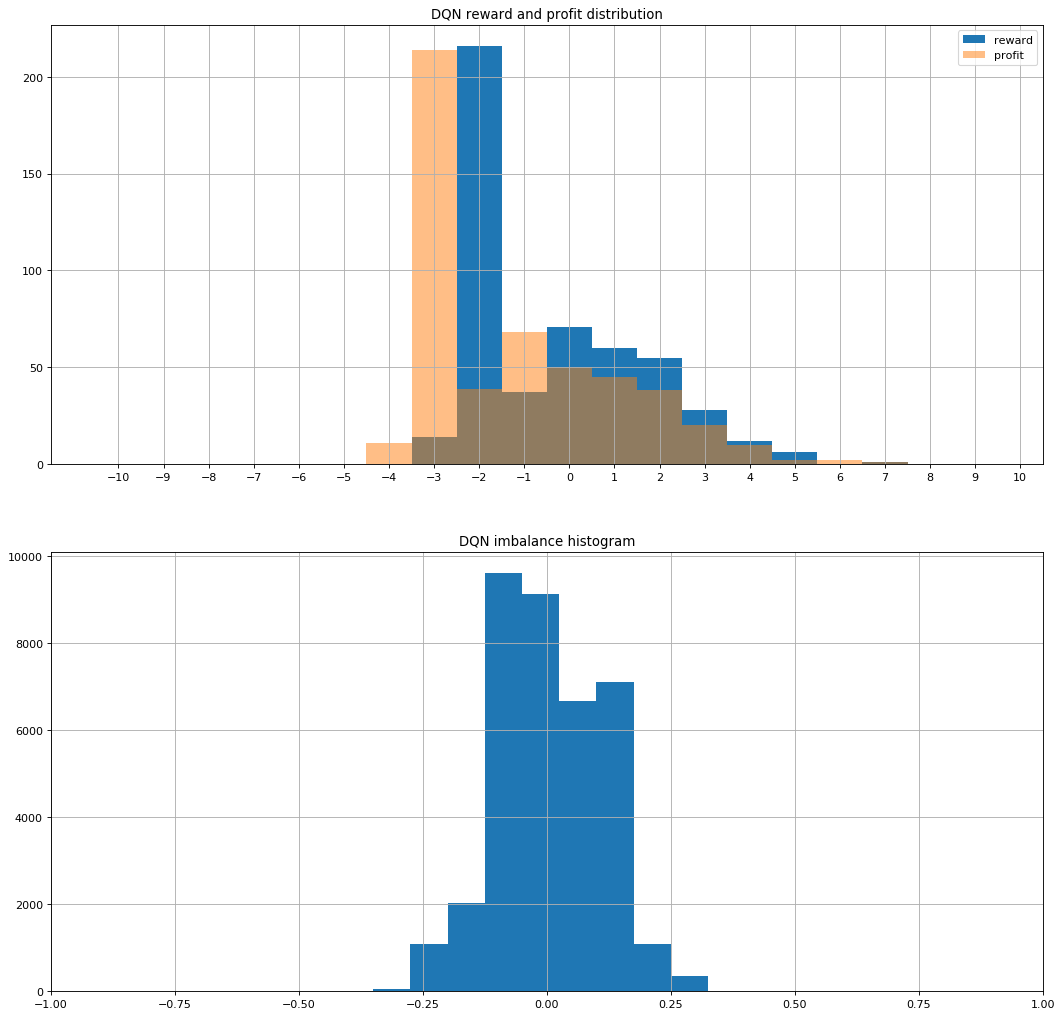

In [14]:
path='Results'
d,memory=experiment.plotbm_results(experiment,'DQN reward and profit distribution',
                                   'DQN imbalance histogram',name=experiment.name,path=path)

In [15]:
d.describe()

,reward,profit,start distance,duration
count,500.000000,500.000000,500.000000,500.000000
mean,-0.344811,-1.164000,0.097600,74.276000
std,1.912070,2.173143,0.016577,33.427453
min,-3.166385,-4.000000,-0.100000,1.000000
25%,-1.956759,-3.000000,0.100000,42.000000
50%,-0.892218,-2.000000,0.100000,100.000000
75%,0.947157,0.000000,0.100000,100.000000
max,6.554815,7.000000,0.100000,100.000000


In [16]:
memory.n_inventory.value_counts(), memory.action.value_counts()

(1.0    37138
 Name: n_inventory, dtype: int64, 1.0    37138
 Name: action, dtype: int64)